## TELCO CUSTOMER CHURN ANALYSIS

### A technical test given to job applicants by Arab Bank for the Data Scientist position.
#### Author: GREJELL B. SEGURA
#### Date: August 04, 2020

##### Dataset Overview: The data contains information on customers at a mid-sized telecom company. 

Objective: Predict customer churn using any machine learning framework (language / statistical model / library) of your choice. Determine what should be the evaluation metrics and optimize your model accordingly.  

Steps: The below steps are just guidelines, feel free to go back and forth as required. 

1. 	Import data 
2. 	EDA 
3. 	Cleaning and pre-processing 
4. 	Graphs and visualizations 
5. 	Train test split	 
6. 	Modeling 
7. 	Hyper parameter tuning and feature engineering 
8. 	Final model evaluation 

Note (from the facilitator): 

1. 	We would like to see all models you’ve tried, not just the one with the best error metrics 
2. 	Please comment your work at every stage 
3. 	Please check for errors before submitting 
4. 	After submitting, there shall be a call where you can take us through your methodology and reasonings 
5. 	If in doubt regarding what a particular field stands for, use your best judgement and move ahead 

### 1. Importing all libraries and data.

In [1]:
import pandas as pd
import numpy as np
import os
from datetime import datetime
import math
import time
import random

# VISUALIZATION
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt


##### In order to have a reproducible analysis, we need to set a random seed. It is useful to reproduce the data given by a pseudo-random number generator.

In [2]:
random.seed(23)

##### We also need to set our working directory.

In [3]:
os.chdir(r'/home/grejell/Projects/arab-bank-test-churn-analysis')

##### Loading the data and taking a quick look at the data dimensions.

In [4]:
data = pd.read_csv('./data/Telco_Customer_Churn.csv')
print('The data has {} rows and {} columns.'.format(data.shape[0], data.shape[1]))

The data has 7043 rows and 21 columns.


##### Let us a quick look at the first 5 rows.

In [5]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


##### Looking at the table above, we can identify that the target variable is "Churn".

### 2. Exploratory Data Analysis (EDA)

##### Identifying all feature names.

In [6]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
data['SeniorCitizen'].value_counts()

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

##### The features tenure, SeniorCitizen, and MonthlyCharges data type were identified to be numerical.
##### SeniorCitizen is a binary feature which means it has entries of only either 1 or 0.
##### However, by observing the table, we can also see that TotalCharges should also be numerical but it is identified as object in the info() function.
##### We need to deal with this and convert the feature to numerical before proceeding.

##### First, we need to search for any character that is not a number or a decimal(.).

In [9]:
char_not_num = data[['TotalCharges']][~data['TotalCharges'].str.contains('[1-9.]')]
char_not_num

,TotalCharges
488,
753,
936,
1082,
1340,
3331,
3826,
4380,
5218,
6670,


In [10]:
print('There are {} rows that were found to have a special character.'.format(len(char_not_num)))

There are 11 rows that were found to have a special character.


##### The special character is blank which is considered a missing value.
##### The 11 rows are only around 0.156% of the data. This is significantly small so we can remove it in our data.

In [11]:
data['TotalCharges'] = data['TotalCharges'].replace(" ",np.nan).astype(float)
data = data[pd.notnull(data['TotalCharges'])].reset_index().drop('index', axis=1)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [13]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

##### There are now NO missing values.
##### We can now have a quick summary of all features.
##### We will start with the numerical features.

In [14]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


##### Based on count, all the numerical feature is filled and has no missing value.

### 2. Graphs and visualizations

##### Our main focus for visualizing is the relationship of the features between the Churn feature.
##### We will therefore visualize based on this.
##### Let us first look on the Churns.

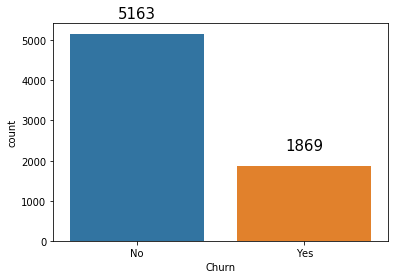

In [15]:
ax = sns.countplot(x="Churn", data=data)
for p in ax.patches:
         ax.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
             ha='center', va='center', fontsize=15, xytext=(0, 20),
             textcoords='offset points')

##### Clearly, the number of churns (YES) is lesser than the non-churns (NO) by a difference of 3,294.
##### Let us now look at the relationship of categorical features against the number of churns.
##### We will first create a visualization function that will show the proportion of the categories that are churned or not.

In [16]:
def plot_categorical(data, feature, rotate=0, orientation='v', y_axis="percentage of customers"):
    plt.figure()
    plt.yticks(fontsize=15)
    plt.xticks(fontsize=15, rotation=rotate)
    sns.set(rc={'figure.figsize':(10,7)})
    five_thirty_eight = [
                        "#30a2da",
                        "#fc4f30",
                        "#e5ae38",
                        "#6d904f",
                        "#8b8b8b",
                        ]
    sns.set_palette(five_thirty_eight)

    graph_data = data.groupby(feature)["Churn"].value_counts().to_frame()
    graph_data = graph_data.rename({"Churn": y_axis}, axis=1).reset_index()
    graph_data[y_axis] = graph_data[y_axis]/len(data)
    if orientation == 'v':
        bar = sns.barplot(x=feature, y= y_axis, hue='Churn', data=graph_data, orient=orientation)
        bar.set_yticklabels(['{:,.0%}'.format(y) for y in bar.get_yticks()])
    else:
        bar = sns.barplot(x= y_axis, y=feature, hue='Churn', data=graph_data, orient=orientation)
        bar.set_xticklabels(['{:,.0%}'.format(x) for x in bar.get_xticks()])
    
    for p in bar.patches:
             bar.annotate("%.2f" % (p.get_height()*100), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=15, xytext=(0, 20),
                 textcoords='offset points')

    bar.axes.set_title(feature,fontsize=20)
    bar.set_xlabel("")
    bar.set_ylabel(y_axis, fontsize=18)
    bar.plot()
    plt.savefig('bar.pdf')

In [17]:
excluded_features = ['customerID', 'SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']
cat_features = data.drop(excluded_features, axis=1)
cat_features.columns

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')

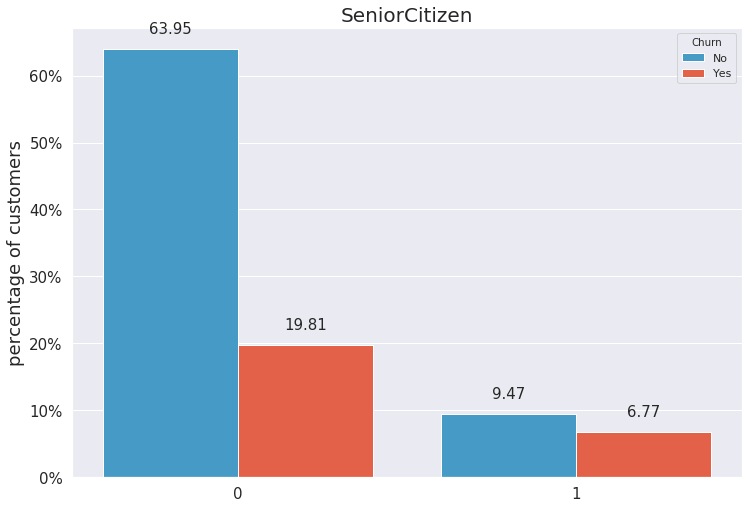

In [43]:
plot_categorical(data=data, feature='SeniorCitizen')

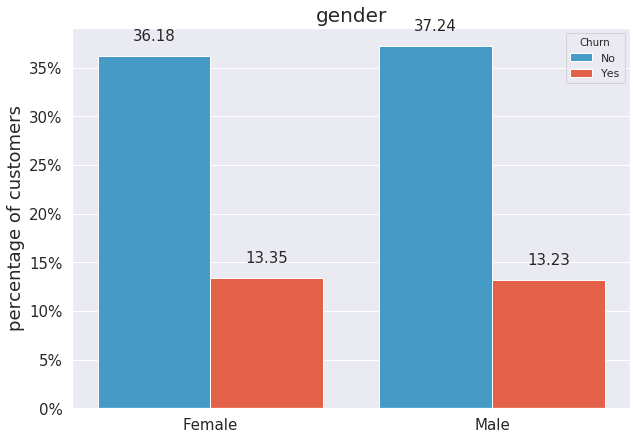

In [19]:
plot_categorical(data=cat_features, feature='gender')

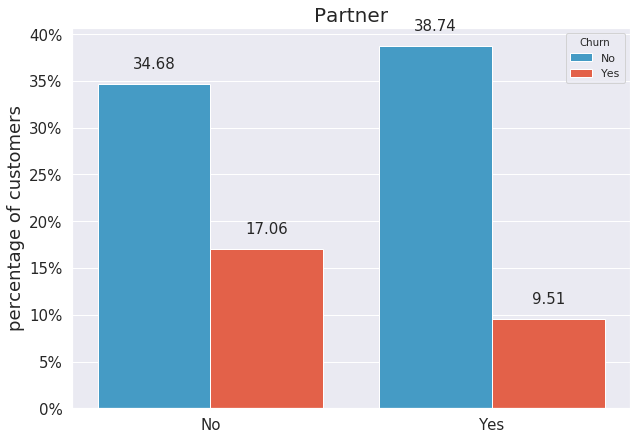

In [20]:
plot_categorical(data=cat_features, feature='Partner')

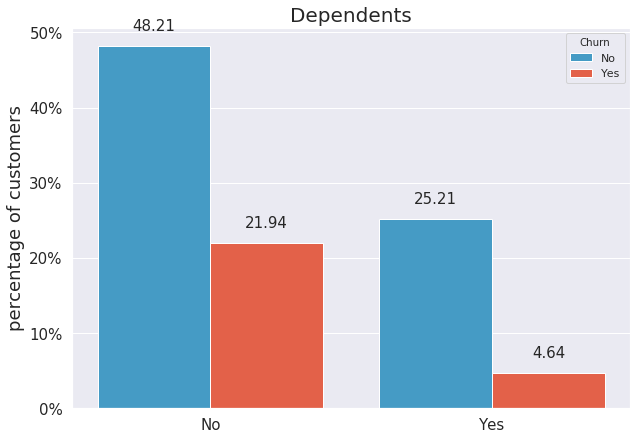

In [21]:
plot_categorical(data=cat_features, feature='Dependents')

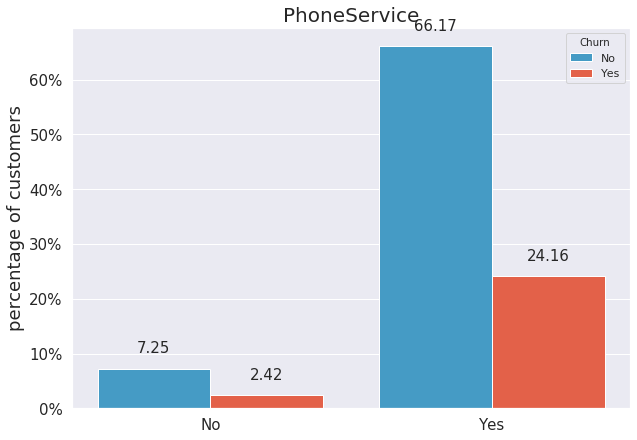

In [22]:
plot_categorical(data=cat_features, feature='PhoneService')

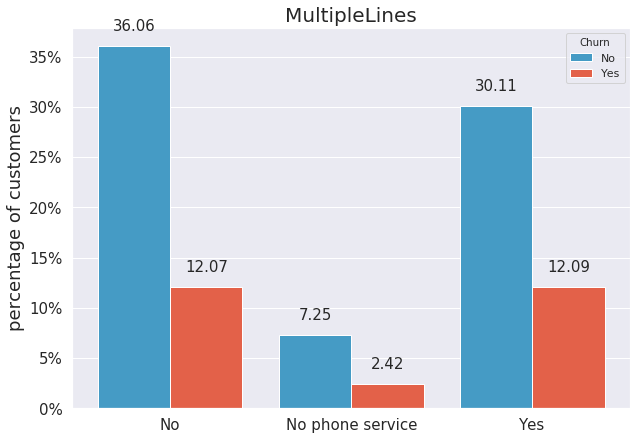

In [23]:
plot_categorical(data=cat_features, feature='MultipleLines')

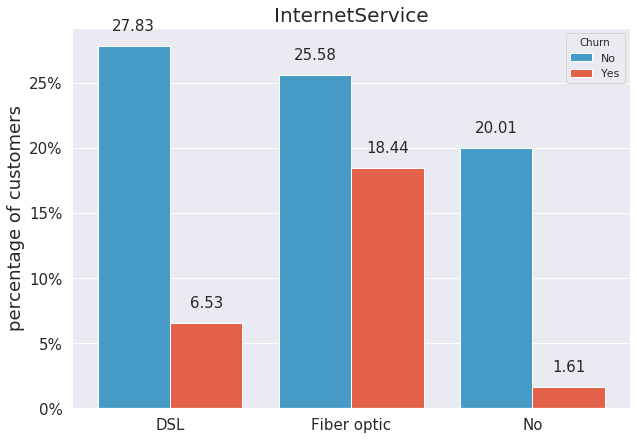

In [24]:
plot_categorical(data=cat_features, feature='InternetService')

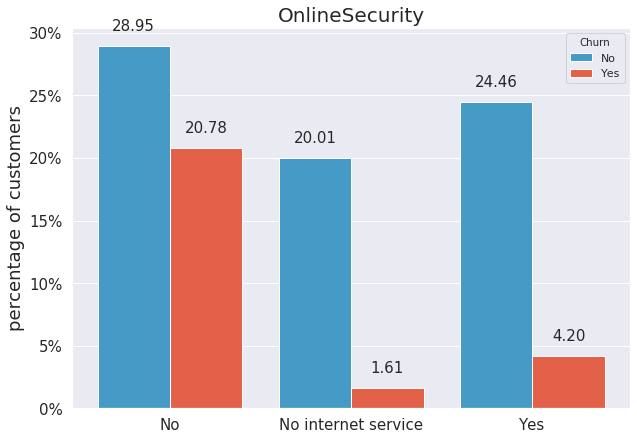

In [25]:
plot_categorical(data=cat_features, feature='OnlineSecurity')

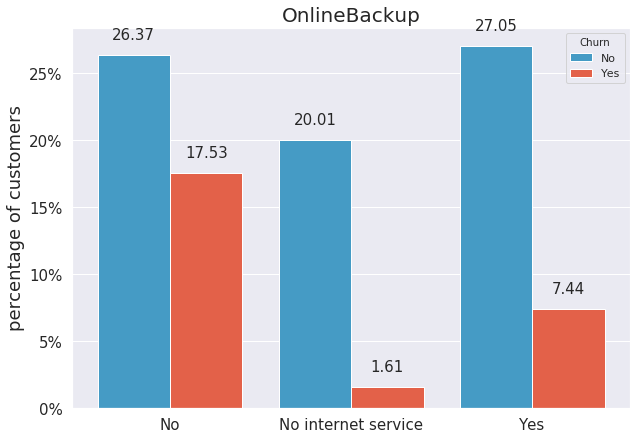

In [26]:
plot_categorical(data=cat_features, feature='OnlineBackup')

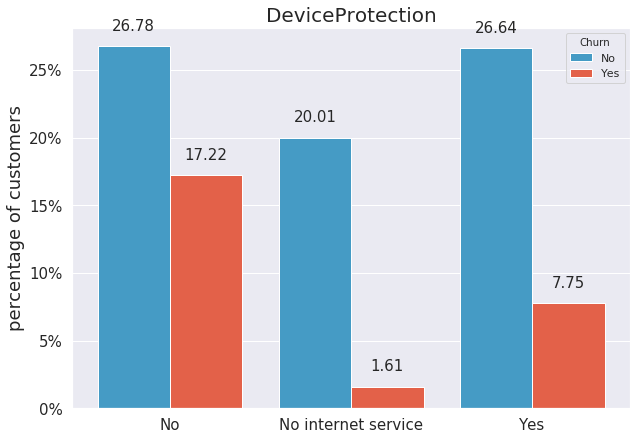

In [27]:
plot_categorical(data=cat_features, feature='DeviceProtection')

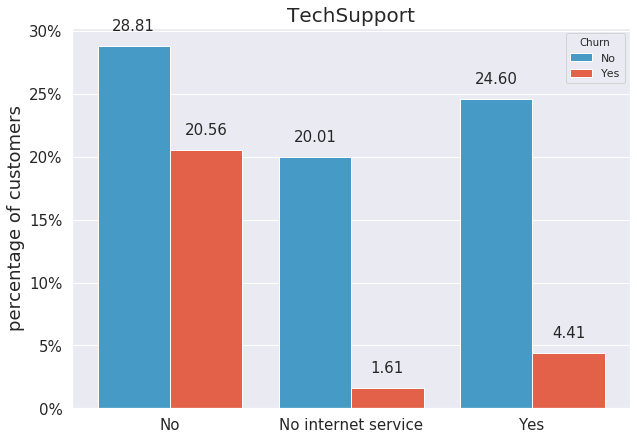

In [28]:
plot_categorical(data=cat_features, feature='TechSupport')

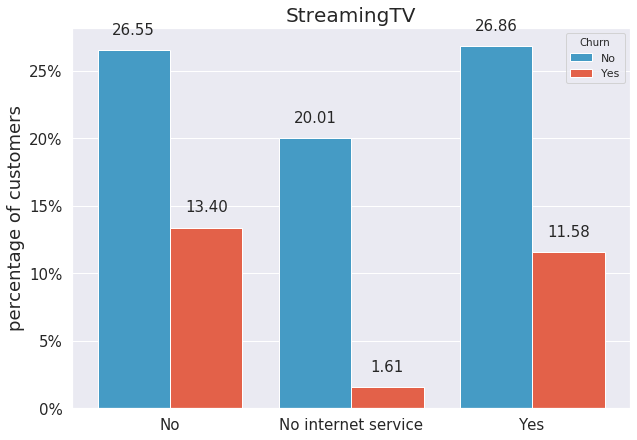

In [29]:
plot_categorical(data=cat_features, feature='StreamingTV')

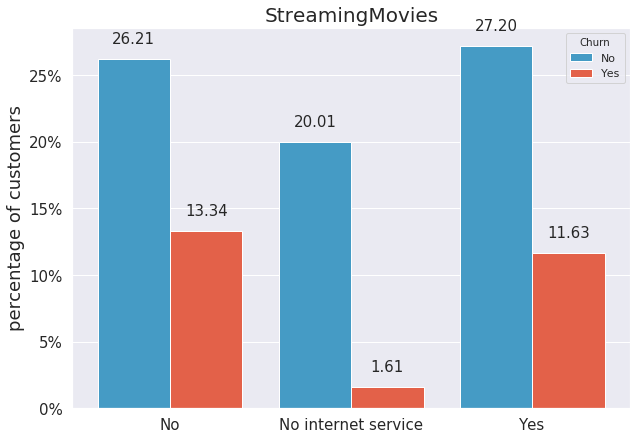

In [30]:
plot_categorical(data=cat_features, feature='StreamingMovies')

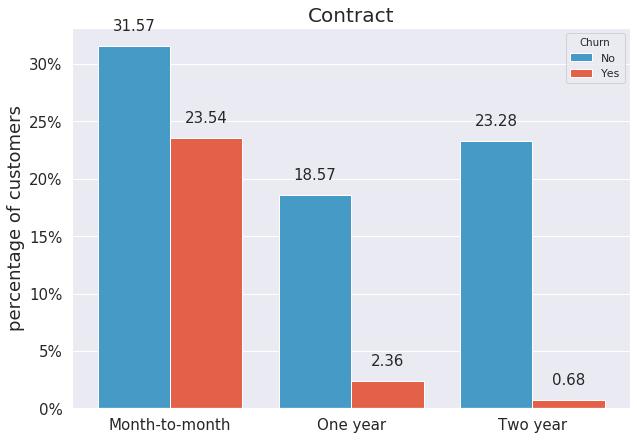

In [31]:
plot_categorical(data=cat_features, feature='Contract')

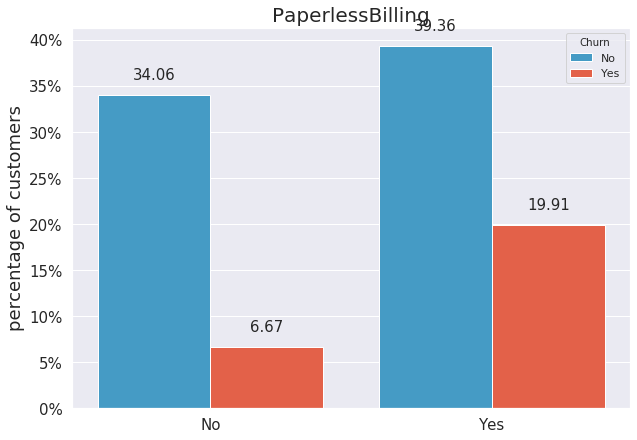

In [32]:
plot_categorical(data=cat_features, feature='PaperlessBilling')

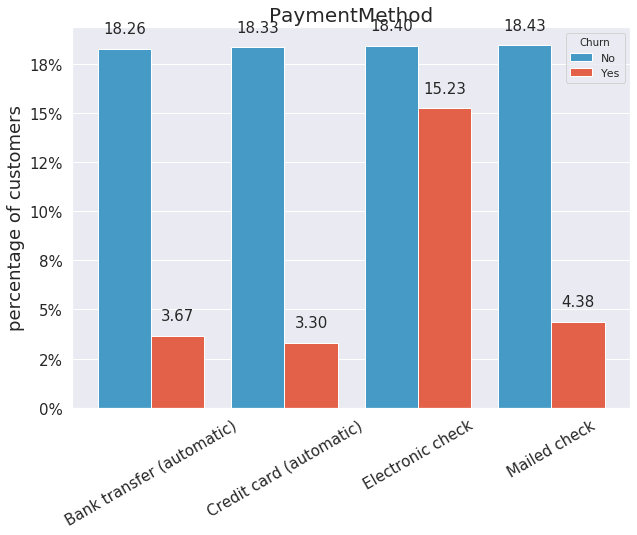

In [33]:
plot_categorical(data=cat_features, feature='PaymentMethod', rotate=30)

##### Let us now look into the numerical features
##### In the same manner, we will also create a plotting function to show the relationship of the numerical features against the churns.

In [34]:
def plot_numerical(data, feature):
    plt.figure()
    plt.yticks(fontsize=15)
    plt.xticks(fontsize=15, rotation=0)
    sns.set(rc={'figure.figsize':(10,7)})
    five_thirty_eight = [
                        "#30a2da",
                        "#fc4f30",
                        "#e5ae38",
                        "#6d904f",
                        "#8b8b8b",
                        ]
    sns.set_palette(five_thirty_eight)
    plot = sns.distplot(data[feature][data['Churn']=='No'], hist = False, kde = True,
                     kde_kws = {'shade': True, 'linewidth': 1}, color='red')
    plot = sns.distplot(data[feature][data['Churn']=='Yes'], hist = False, kde = True,
                     kde_kws = {'shade': True, 'linewidth': 1})
    plot.axes.set_title(feature,fontsize=20)
    plot.set_xlabel("")
    plot.set_ylabel('density', fontsize=18)
    plot.legend(labels=['No','Yes'], title='Churn')
    plot.plot()
    plt.savefig('bar.pdf')

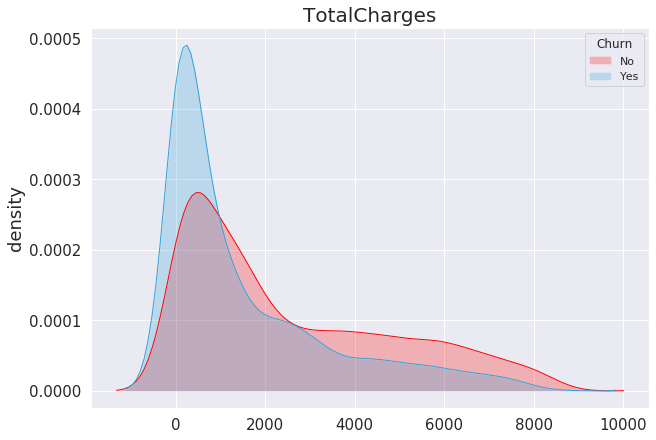

In [35]:
plot_numerical(data=data, feature='TotalCharges')

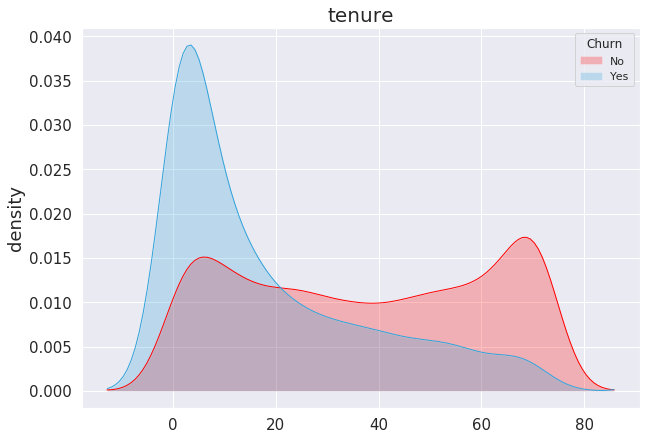

In [36]:
plot_numerical(data=data, feature='tenure')

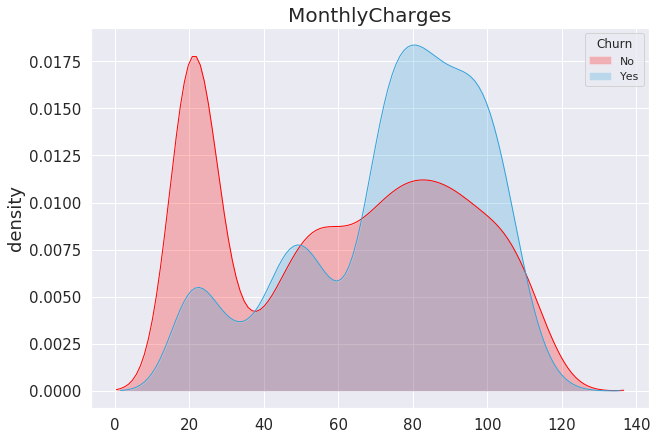

In [37]:
plot_numerical(data=data, feature='MonthlyCharges')

In [38]:
scatter_data = data[['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']]

def plot_pair(data, x_feature, y_feature):
    sns.set(rc={'figure.figsize':(12,8.27)})
    sns.set(font_scale = 1.5)
    sns.scatterplot(x=x_feature, y=y_feature, data=data, hue='Churn', s=100, alpha=0.7)

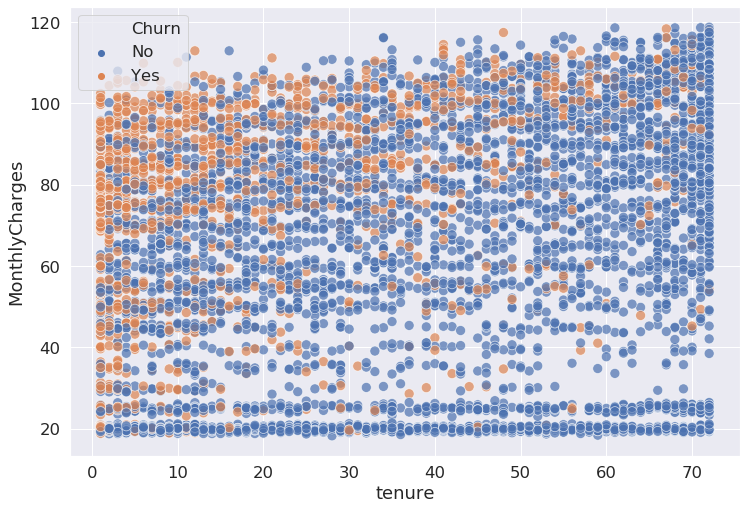

In [39]:
plot_pair(scatter_data, 'tenure', 'MonthlyCharges')

##### The churns are concentrated on the higher MonthlyCharges and lower tenure

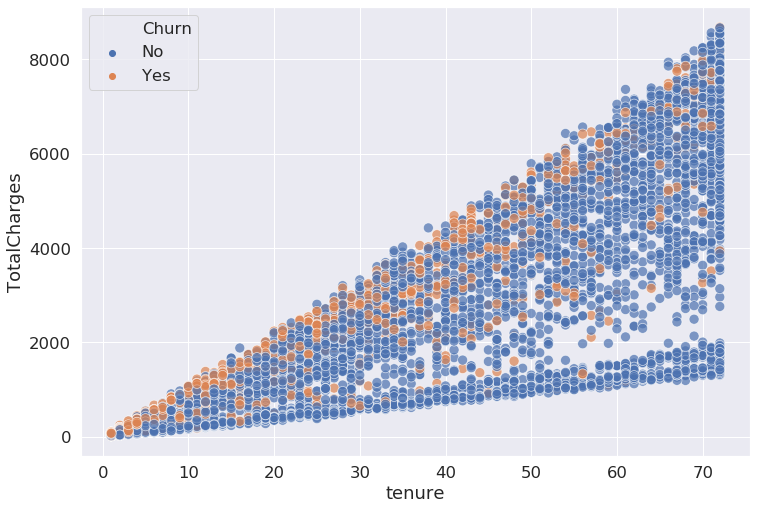

In [40]:
plot_pair(scatter_data, 'tenure', 'TotalCharges')

##### The churn is concentrated on the relatively high TotalCharges for every increase in tenure.

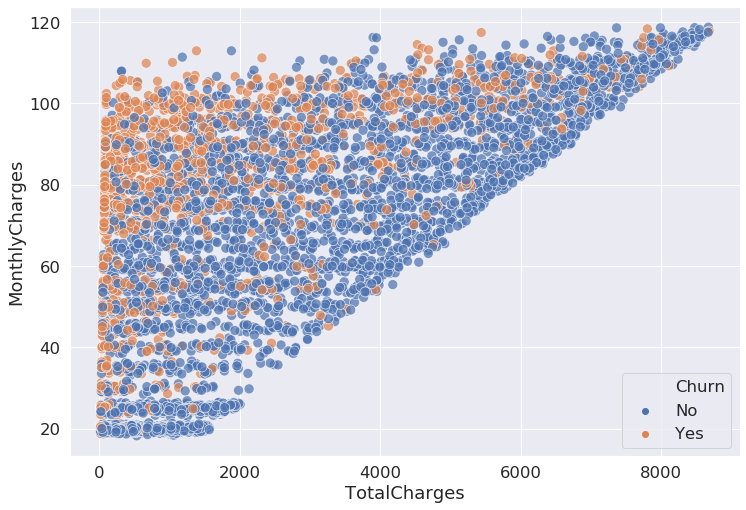

In [41]:
plot_pair(scatter_data, 'TotalCharges', 'MonthlyCharges')

##### The churn is concentrated on the relatively higher MonthlyCharges

### 3. Data Pre-processing

##### Data pre-processing will involve converting the categorical variables into numerical.
##### This is because most of the machine learning models only accepts numerical inputs.
##### There are a number of ways/process to convert the categorical variables into numerical.
##### One is label encoding, where each category will be assigned a certain number, i.e., for ['YES', 'NO', 'UNKNOWN', 'MAYBE'] will be converted to [1,2,3,4] respectively.
##### Another is the one-hot-coding, which converts all categories into a binary [0,1].
##### We will use the one-hot-coding method for this analysis.

In [52]:
cat_features = cat_features.columns

In [64]:
customerID = data.customerID

In [66]:
cleanData = pd.get_dummies(data.drop(['customerID'],axis=1), prefix = cat_features)

In [70]:
cleanData.columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
       'gender_Female', 'gender_Male', 'Partner_No', 'Partner_Yes',
       'Dependents_No', 'Dependents_Yes', 'PhoneService_No',
       'PhoneService_Yes', 'MultipleLines_No',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', '

In [74]:
!pip install lazypredict
!pip install xgboost
!pip install lightgbm

     |████████████████████████████████| 1.2 MB 3.7 MB/s eta 0:00:01


In [75]:
from lazypredict.Supervised import LazyClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

X = cleanData.drop('Churn_Yes', axis=1)
y= cleanData.Churn_Yes

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.3,random_state =123)

clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)

print(models)

100%|██████████| 30/30 [00:04<00:00,  6.89it/s]

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
QuadraticDiscriminantAnalysis      0.76               0.72     0.72      0.76   
NearestCentroid                    0.69               0.71     0.71      0.70   
GaussianNB                         0.77               0.70     0.70      0.76   
LinearDiscriminantAnalysis         0.78               0.70     0.70      0.77   
XGBClassifier                      0.78               0.69     0.69      0.76   
LabelPropagation                   0.78               0.69     0.69      0.77   
CalibratedClassifierCV             0.78               0.69     0.69      0.77   
LogisticRegression                 0.78               0.69     0.69      0.77   
RandomForestClassifier             0.77               0.68     0.68      0.76   
LGBMClassifier                     0.78               0.68     0.68      0.76   
LinearSVC                   